# Pymaceuticals Inc.
---

### Analysis

- The number of mice for Capomulin was 230 in which it is  the maximum frequency of test carried on mice. The second maximum test figure was Ramicane which has 228 test.
- From the pie chart it has been found that both genders are nearly equal in which male is 50.6 and female is 49.4.  This shows test sample is a signal for balanced population.
- The slope which is correlation between mouse weight and average tumor volume has been found to be  0.84. This indicates there exist positive correlation between the two parameters such that  both weight and average tumor volume   increases in the same direction.  

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files - loading the source files and storing to the varibales " mouse_metadata_path and study_results_path "
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [9]:
# Read the mouse data and the study results -  reading the loaded data files converted to object file
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
# Read the mouse data and the study results -  reading the loaded data files converted to object file
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Combine the data into a single dataset -  merging the files 
combined_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
combined_df.shape # displays the number of rows and columns  

(1893, 8)

In [13]:
# Checking the number of mice.- finding the number of unique list of Mouse ID (exluding the duplicates)
number_of_mice = combined_df["Mouse ID"].nunique() # on my data frame "combine_pd", need to find numbr of unique values in Mouse ID column
number_of_mice

249

In [16]:
# value_counts() finds the frequecny of each mice inthe data frame - more than one frequency mean there is duplicate
frequency_of_mice = combined_df["Mouse ID"].value_counts()  
Total_counts = combined_df["Mouse ID"].value_counts().sum()  
frequency_of_mice 

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID.  - loc[ row, :] # all the column labels to be included by slicing
dup_mice_ID_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_Mouse_ID_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID_df)==False]
clean_Mouse_ID_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
# Checking the number of mice in the clean DataFrame.
clean_number__of_mice = clean_Mouse_ID_df["Mouse ID"].count()
clean_number__of_mice

1893

In [21]:
# Frequency of clead data frame based on Mouse ID  - Checking
frq_clean_Mouse_ID_df = clean_Mouse_ID_df["Mouse ID"].value_counts()
frq_clean_Mouse_ID_df

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
reg_mean   = clean_Mouse_ID_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_median = clean_Mouse_ID_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var    = clean_Mouse_ID_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std    = clean_Mouse_ID_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem    = clean_Mouse_ID_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stat_df = pd.DataFrame({"Mean ":reg_mean, 
                            "Median":reg_median, 
                           "Variance":reg_var, 
                           "Standard deviation.":reg_std, 
                           "standard error of the mean (SEM).":reg_sem})  

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat_df

,Mean,Median,Variance,Standard deviation.,standard error of the mean (SEM).
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df=  clean_Mouse_ID_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# first create a group series using the 'Drug Regimen' 
Drug_Regimen_frequency  = clean_Mouse_ID_df["Drug Regimen"].value_counts()
Drug_Regimen_frequency

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

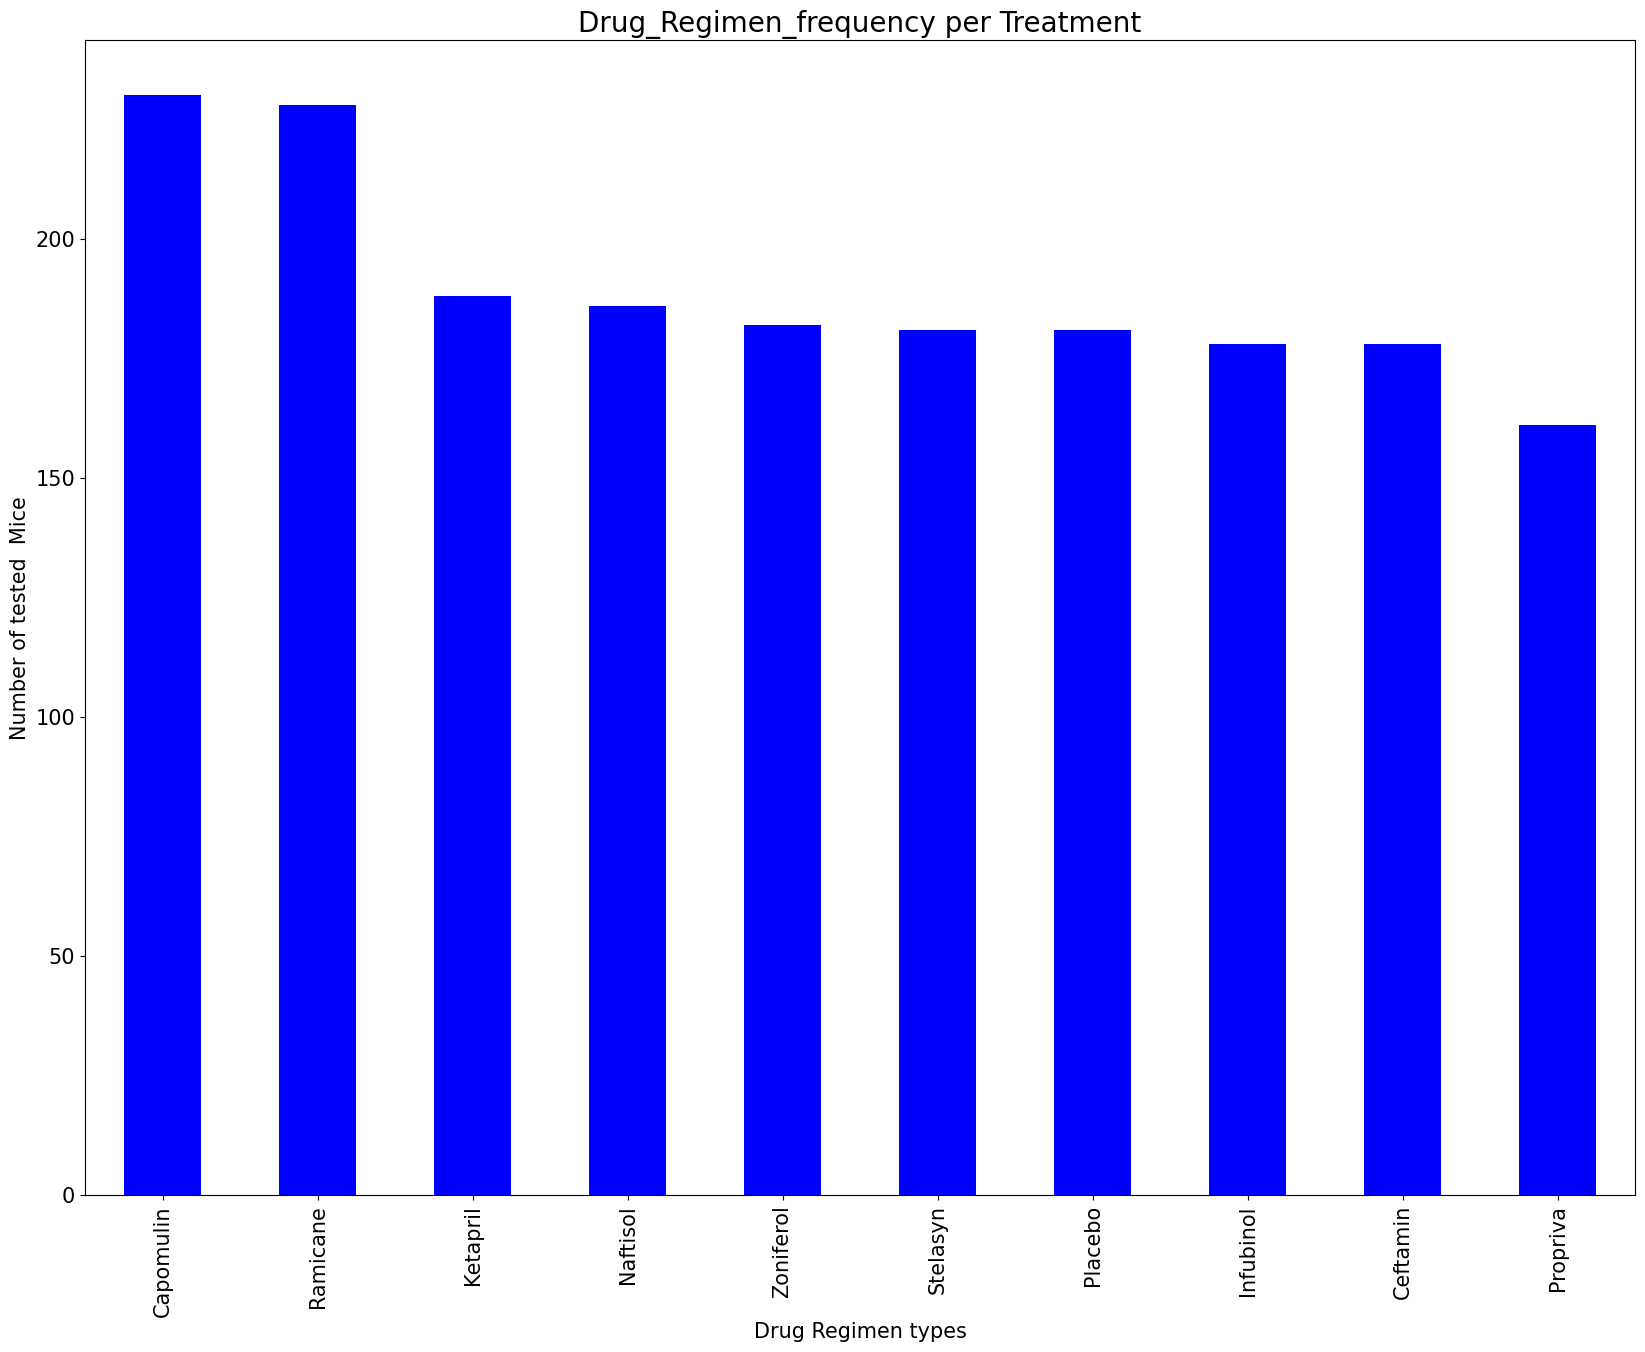

In [25]:
# Plot the bar chart using pandas
plot_pandas_bar = Drug_Regimen_frequency.plot.bar( color='b', figsize=(20,15), fontsize = 15)    
#Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen types", fontsize = 15)
plt.ylabel("Number of tested  Mice", fontsize = 15)
plt.title("Drug_Regimen_frequency per Treatment", fontsize = 20)
plt.savefig("./Images/pandas_bar_Drug_Regimen_frequency.png",bbox_inches = "tight")
plt.show()


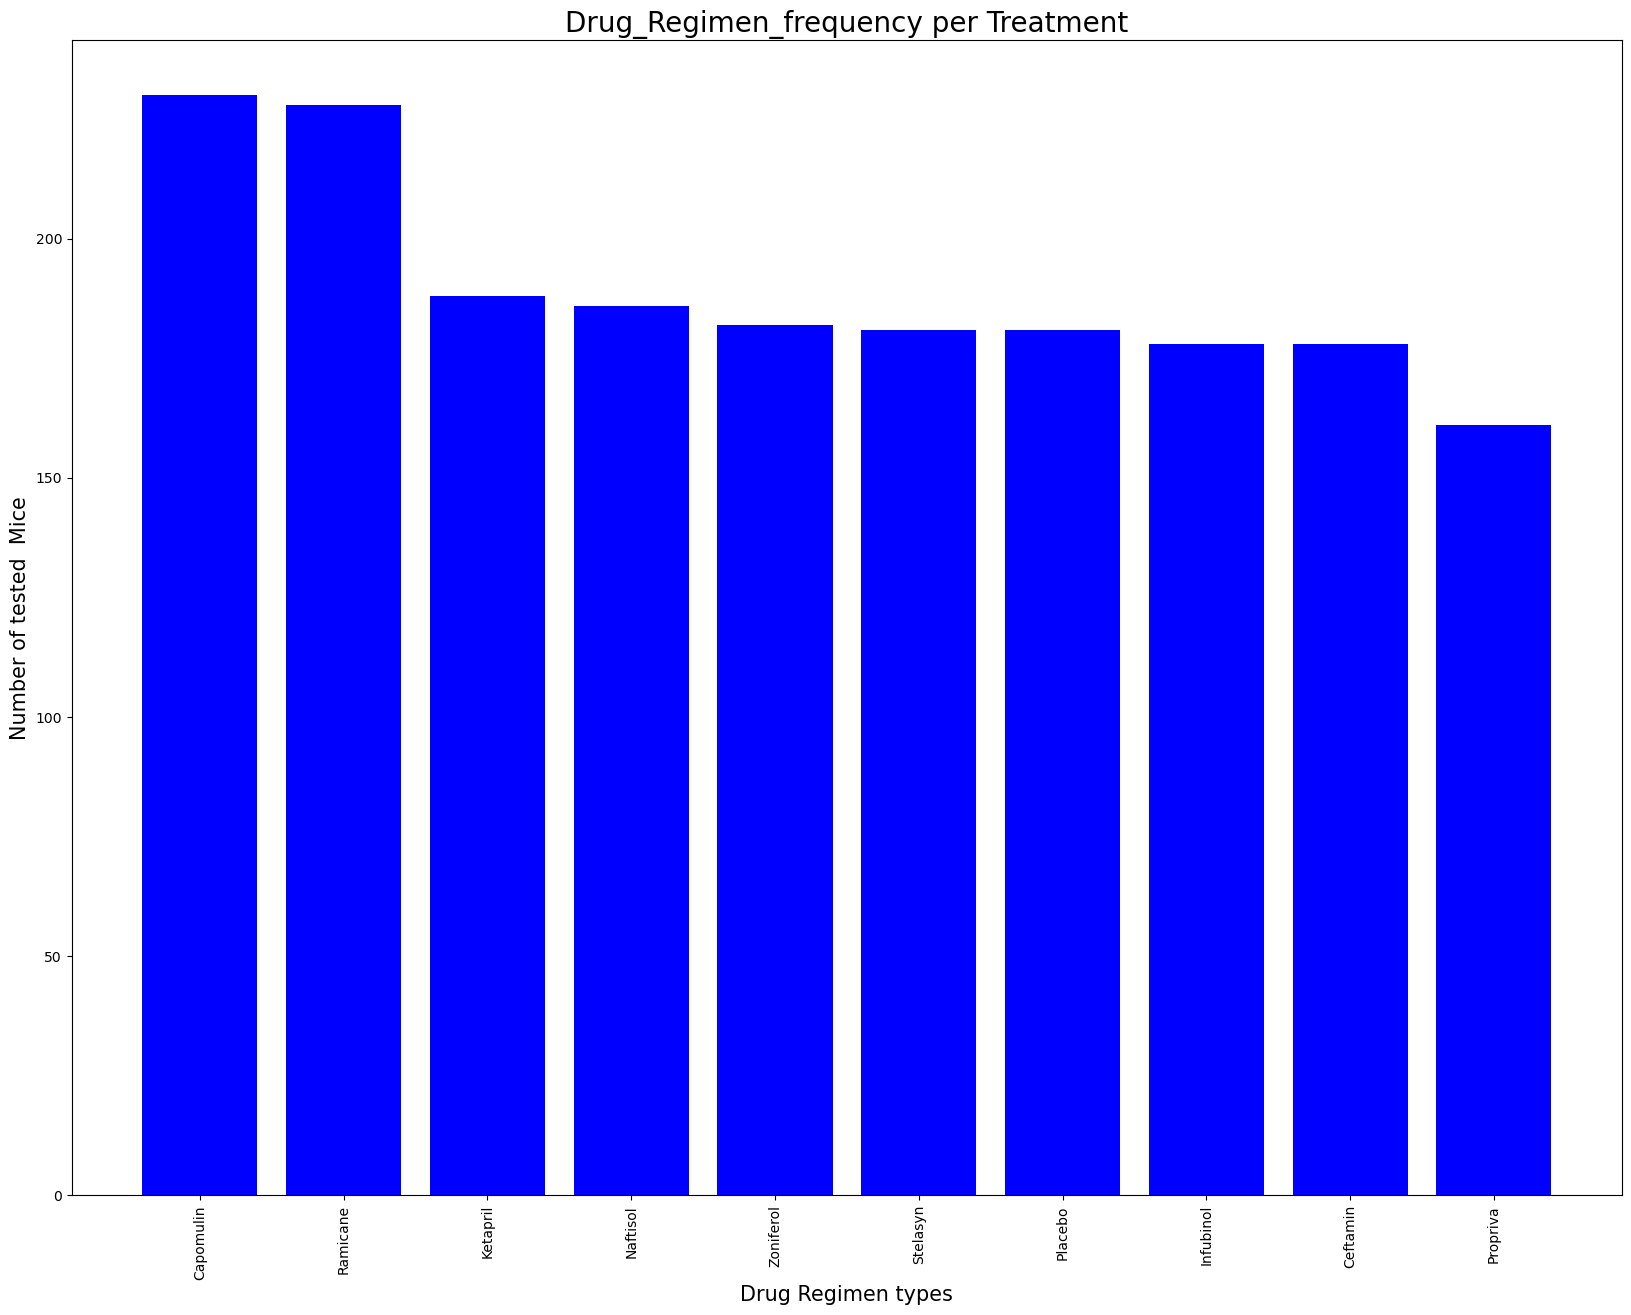

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create a matplotlib.Pyplot bar plot based on Drug_Regimen_frequency and Drug Regimen types
x_axis = np.arange(len(Drug_Regimen_frequency))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(20,15))

plt.xticks(tick_locations, Drug_Regimen_frequency.index.values, rotation="vertical")
plt.bar(x_axis, Drug_Regimen_frequency, color='b', alpha=1, align="edge")
plt.title("Drug_Regimen_frequency per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen types",fontsize = 15)
plt.ylabel("Number of tested  Mice",fontsize = 15)
plt.savefig("./Images/pyplot_bar_Drug_Regimen_frequency.png", bbox_inches = "tight")
plt.show()


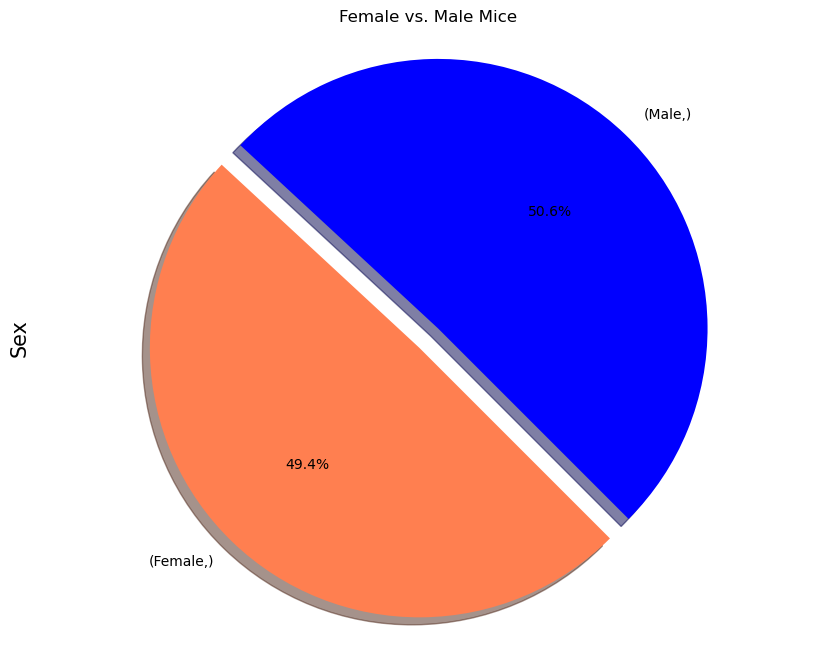

,gender_count
Male,958
Female,935


In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_rows = combined_df.loc[:, ["Sex"]].value_counts() #  all rows and two columns (Sex and Mouse ID)
gender_data_df = pd.DataFrame({"gender_count": combined_df["Sex"].value_counts(), })
colors = ["blue", "coral"]
explode = (0.1, 0)
plt.title("Female vs. Male Mice")
pandas_pie = gender_rows.plot.pie( figsize=(10,8), colors=colors, startangle=315, explode=explode, shadow=True, autopct= "%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex',fontsize = 15)
plt.savefig("./Images/pandas_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()
gender_data_df

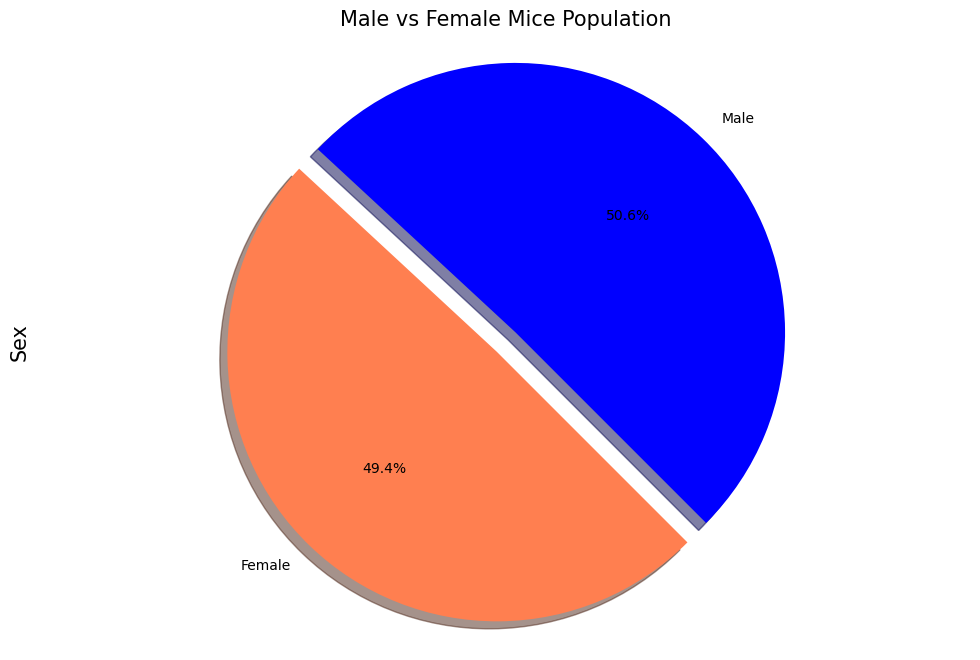

,gender_count
Male,958
Female,935


In [28]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib.pyplot
gender_rows = combined_df.loc[:, ["Sex"]] #slicing gener rows
gender_count = gender_rows["Sex"].value_counts()
gender_data_df = pd.DataFrame({"gender_count": combined_df["Sex"].value_counts(), })
labels = ["Male", "Female"]
colors = ["blue", "coral"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Male vs Female Mice Population",fontsize = 15)
plt.ylabel("Sex",fontsize = 15)
plt.pie(gender_count, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
#Set equal axis
plt.axis("equal")
plt.savefig("./Images/pyplot_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()

gender_data_df

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Capomulin
Capomulin_df = clean_Mouse_ID_df.loc[clean_Mouse_ID_df["Drug Regimen"] == "Capomulin",:] # only for Capomulin rows 
Ramicane_df = clean_Mouse_ID_df.loc[clean_Mouse_ID_df["Drug Regimen"] == "Ramicane", :]  # only for Ramicane rows 
Infubinol_df = clean_Mouse_ID_df.loc[clean_Mouse_ID_df["Drug Regimen"] == "Infubinol", :]  # only for Infubinol rows 
Ceftamin_df = clean_Mouse_ID_df.loc[clean_Mouse_ID_df["Drug Regimen"] == "Ceftamin", :]   # only for Ceftamin rows 

In [30]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_Mouse_ID_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [31]:
#Capomulin
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lower_quartile = round(quartiles[0.25],2)
upper_quartile = round(quartiles[0.75],2)
inter_quartile = round(upper_quartile-lower_quartile,2)


print(f"The lower quartile of Capomulin tumors = {lower_quartile}")
print(f"The upper quartile of Capomulin tumors = {upper_quartile}")
print(f"The interquartile range of Capomulin tumors = {inter_quartile}")
print(f"The median of Capomulin tumors = {quartiles[0.5]} ")

lower_bound = round(lower_quartile - (1.5*inter_quartile),2)
upper_bound = round(upper_quartile + (1.5*inter_quartile),2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors = 32.38
The upper quartile of Capomulin tumors = 40.16
The interquartile range of Capomulin tumors = 7.78
The median of Capomulin tumors = 38.1251644 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [32]:
# Start by getting the last (greatest) timepoint for each mouse
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID')['Timepoint'].max()
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_Mouse_ID_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [33]:
# Determine outliers using upper and lower bounds
#Ramicane
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = round(Ramicane_tumors.quantile([.25,.5,.75]),2)
lower_quartile = round(quartiles[0.25],2)
upper_quartile = round(quartiles[0.75],2)
inter_quartile = round(upper_quartile-lower_quartile,2)

print(f"The lower quartile of Ramicane tumors = {lower_quartile}")
print(f"The upper quartile of Ramicane tumors = {upper_quartile}")
print(f"The interquartile range of Ramicane tumors = {inter_quartile}")
print(f"The median of Ramicane tumors = {quartiles[0.5]} ")

lower_bound = round(lower_quartile - (1.5*inter_quartile),2)
upper_bound = round(upper_quartile + (1.5*inter_quartile),2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors = 31.56
The upper quartile of Ramicane tumors = 40.66
The interquartile range of Ramicane tumors = 9.1
The median of Ramicane tumors = 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [34]:
# Start by getting the last (greatest) timepoint for each mouse
# Infubinol 
Infubinol_last = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_Mouse_ID_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [35]:
# Determine outliers using upper and lower bounds
#Infubinol
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = round(Infubinol_tumors.quantile([.25,.5,.75]),2)
lower_quartile = round(quartiles[0.25],2)
upper_quartile = round(quartiles[0.75],2)
inter_quartile = round(upper_quartile-lower_quartile,2)

print(f"The lower quartile of Infubinol tumors = {lower_quartile}")
print(f"The upper quartile of Infubinol tumors = {upper_quartile}")
print(f"The interquartile range of Infubinol tumors = {inter_quartile}")
print(f"The median of Infubinol tumors = {quartiles[0.5]} ")

lower_bound = round(lower_quartile - (1.5*inter_quartile),2)
upper_bound = round(upper_quartile + (1.5*inter_quartile),2)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors = 54.05
The upper quartile of Infubinol tumors = 65.53
The interquartile range of Infubinol tumors = 11.48
The median of Infubinol tumors = 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [36]:
# Start by getting the last (greatest) timepoint for each mouse
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_Mouse_ID_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [37]:
# Ceftamin
# Determine outliers using upper and lower bounds
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = round(Ceftamin_tumors.quantile([.25,.5,.75]),2)
lower_quartile = round(quartiles[0.25],2)
upper_quartile = round(quartiles[0.75],2)
inter_quartile = round(upper_quartile-lower_quartile,2)

print(f"The lower quartile of treatment = {lower_quartile}")
print(f"The upper quartile of temperatures = {upper_quartile}")
print(f"The interquartile range of temperatures = {inter_quartile}")
print(f"The the median of temperatures = {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = round(lower_quartile - (1.5*inter_quartile),2)
upper_bound = round(upper_quartile + (1.5*inter_quartile),2)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment = 48.72
The upper quartile of temperatures = 64.3
The interquartile range of temperatures = 15.58
The the median of temperatures = 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


In [38]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [40]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    inter_quartile = round(upper_quartile-lower_quartile,2)
    
    lower_bound = round(lower_quartile - (1.5*inter_quartile),2)
    upper_bound = round(upper_quartile + (1.5*inter_quartile),2)


    if treatment == 0:
        print(f"                                                 ")
    print(f"The lower quartile of {drug} treatments is: {lower_quartile}")
    print(f"The upper quartile of {drug} treatments is: {upper_quartile}")
    print(f"The interquartile range of {drug} treatments is: {inter_quartile}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"                                                       ")
    treatment+=1

                                                 
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
                                                       
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
                                                       
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
                                                       
The lower 

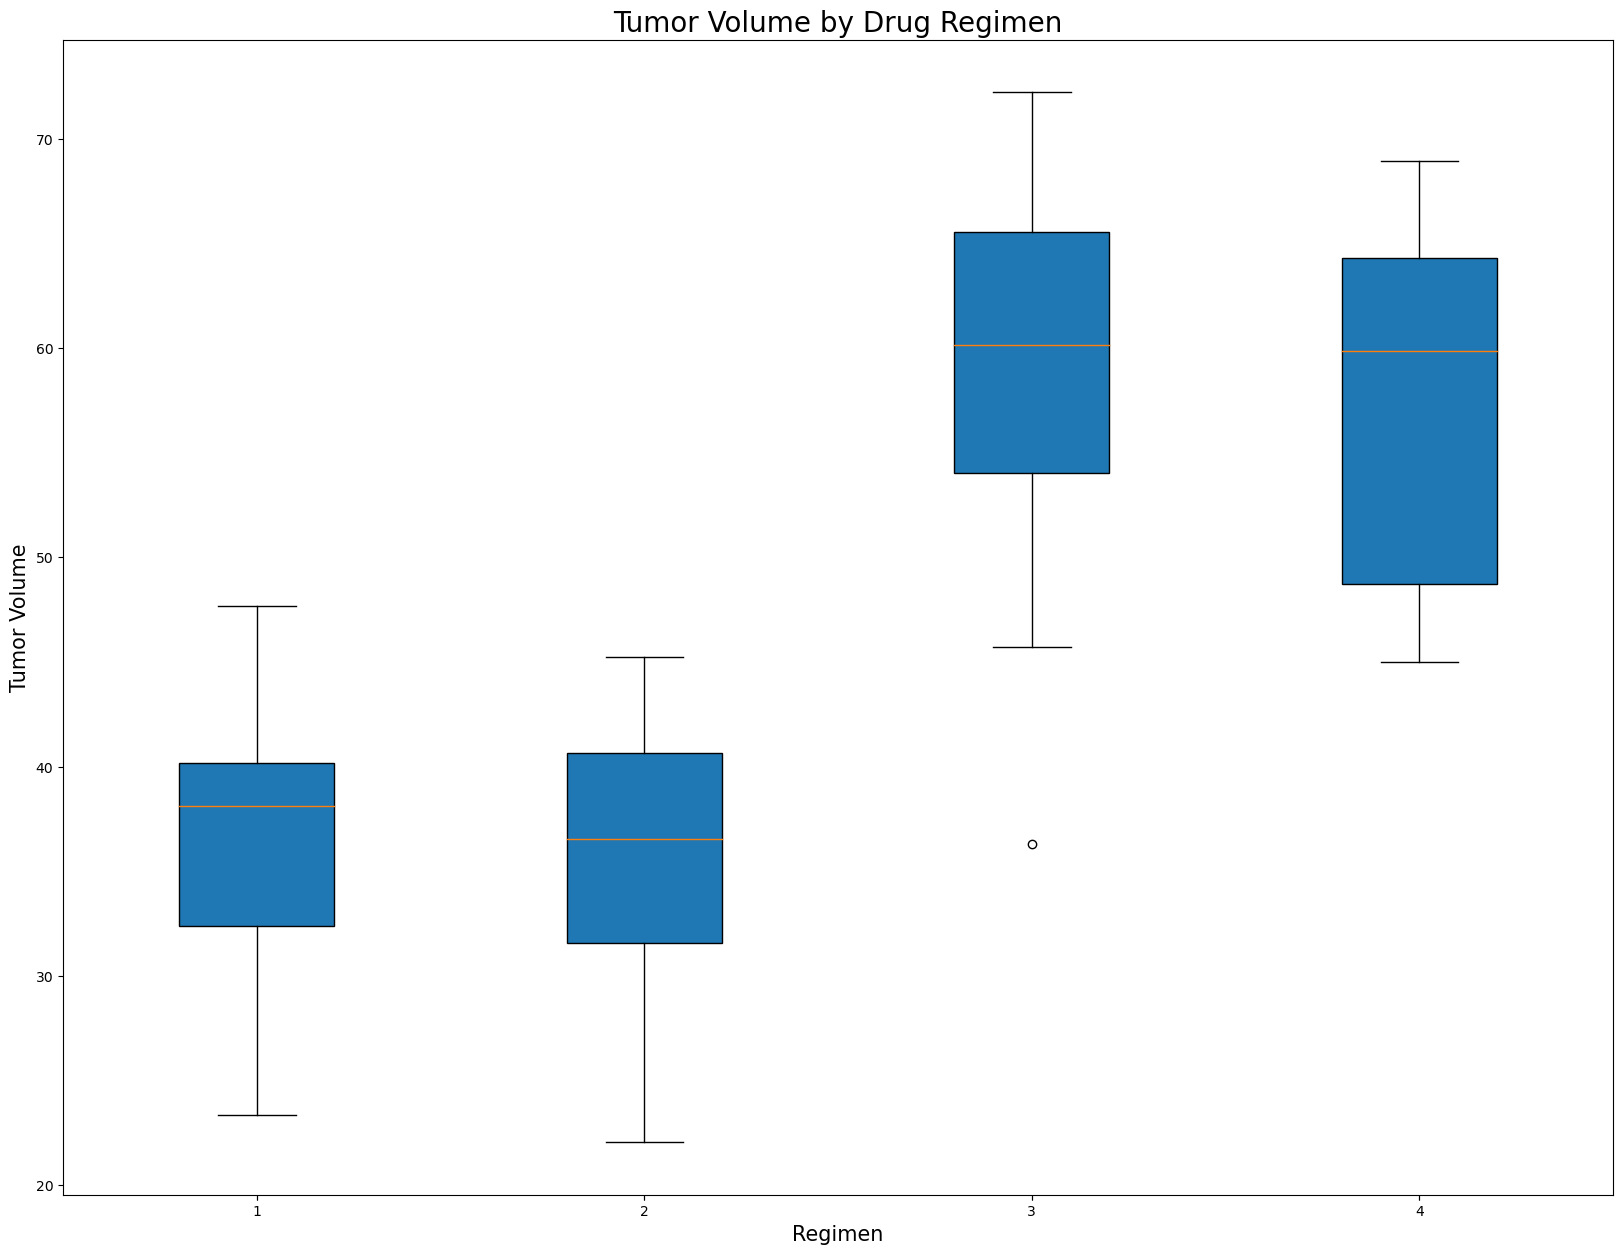

In [41]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize=(20,15))
plt.xlabel("Regimen",fontsize =15)
plt.xticks([1,2,3,4], drug_list, rotation=0)
plt.ylabel("Tumor Volume",fontsize = 15)
plt.title("Tumor Volume by Drug Regimen", fontsize = 20)
plt.boxplot(boxplot_list,  widths = 0.4, patch_artist=True,vert=True)
plt.savefig("./Images/pyplot_boxplot_final_tumor_vol.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

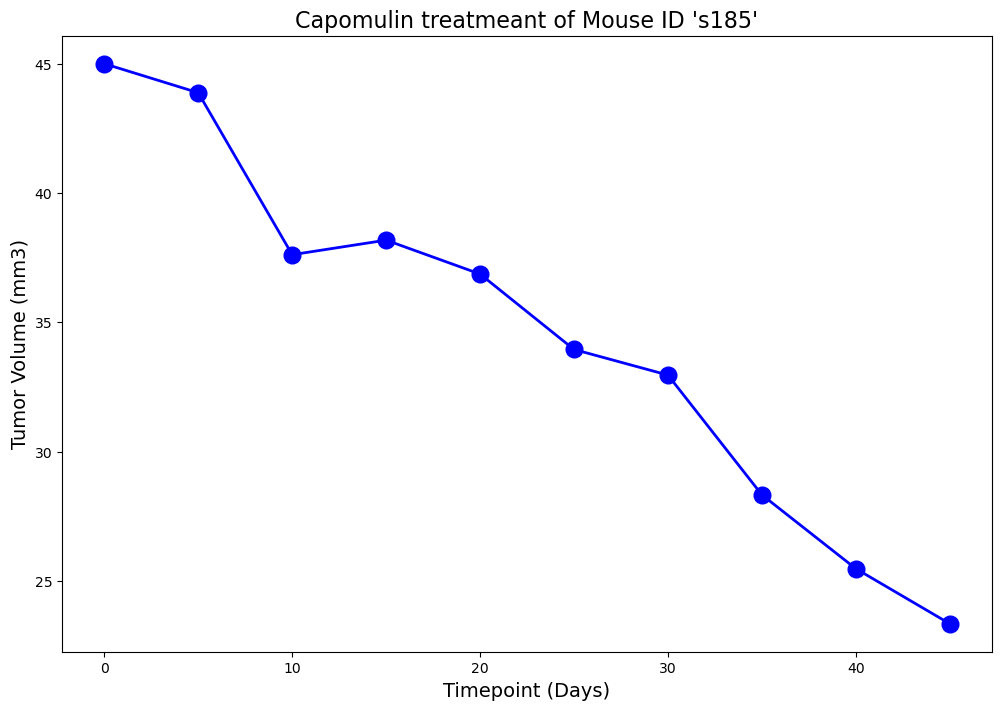

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
capomulin_df

# Get data for a specific mouse (e.g. Mouse ID = "s185")
mouce_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
mouce_in_capomulin

# Specify plot parameters
x_axis = mouce_in_capomulin["Timepoint"]
tumor_volume = mouce_in_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.savefig("./Images/mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

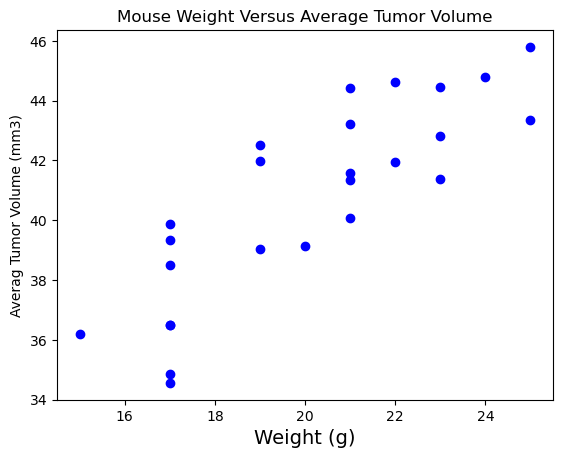

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
Average_Capomulin_volume =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(Average_Capomulin_volume['Weight (g)'],Average_Capomulin_volume['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Average_Capomulin_volume['Weight (g)'],Average_Capomulin_volume['Tumor Volume (mm3)'])
print(f" Correlation between mouse weight and Average tumor volume = {round(correlation[0],2)}")

 Correlation between mouse weight and Average tumor volume = 0.84


line equation :  y = 0.95x + 21.55


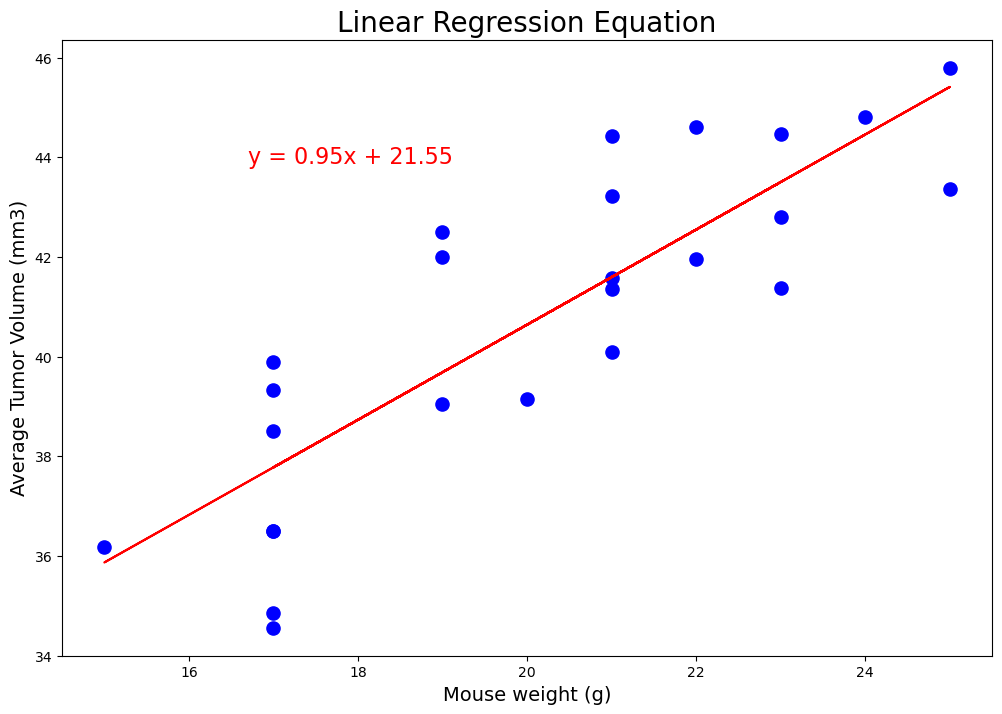

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

x_values = Average_Capomulin_volume['Weight (g)']
y_values = Average_Capomulin_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("line equation : ", line_eq)


fig, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")

plt.savefig("./Images/corr_Avg_Cap_vol_and_wt_scatterplot.png", bbox_inches = "tight")
plt.show()
